In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import pair_confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv("/content/Liver_disease_data.csv")
df.head()
df.shape
df.size
df.count()
df['Diagnosis'].value_counts()


,count
Diagnosis,
1,936
0,764


<Axes: xlabel='Gender', ylabel='Age'>

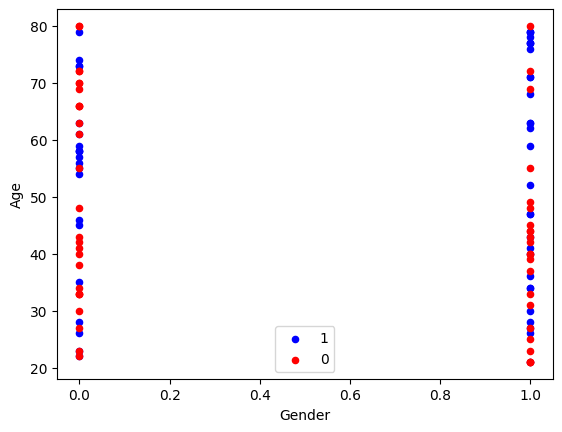

In [4]:
first_df = df[df['Diagnosis']==1][0:50]
second_df =df[df['Diagnosis']==0][0:50]
axes = first_df.plot(kind='scatter',x='Gender',y='Age',color='blue',label='1')
second_df.plot(kind='scatter',x='Gender',y='Age',color='red',label='0',ax=axes)

In [5]:
df.dtypes

,0
Age,int64
Gender,int64
BMI,float64
AlcoholConsumption,float64
Smoking,int64
GeneticRisk,int64
PhysicalActivity,float64
Diabetes,int64
Hypertension,int64
LiverFunctionTest,float64


LINEAR REGRESSION

In [47]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(df[['Age','Gender','BMI','AlcoholConsumption','Smoking','GeneticRisk','PhysicalActivity','Diabetes','Hypertension','LiverFunctionTest']],df['Diagnosis'])

LinearRegression()

In [48]:
reg.coef_

array([ 0.00434727,  0.18055783,  0.01089223,  0.03174456,  0.22955967,
        0.0940472 , -0.01814417,  0.12348667,  0.19926335,  0.00773933])

In [49]:
reg.intercept_

-0.9103672834024517

In [52]:
df

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1
...,...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961,1
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528,1
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370,1
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875,1


In [53]:
reg.predict([[58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.69348751])

In [6]:
df.columns
feature=df[['Age','Gender','BMI','AlcoholConsumption','Smoking','GeneticRisk','PhysicalActivity','Diabetes','Hypertension','LiverFunctionTest']]
X=np.asarray(feature)
Y=np.asarray(df['Diagnosis'])
X[0:5]


array([[58.        ,  0.        , 35.85758415, 17.27282843,  0.        ,
         1.        ,  0.65894018,  0.        ,  0.        , 42.73424003],
       [71.        ,  1.        , 30.73247015,  2.20126568,  0.        ,
         1.        ,  1.67055669,  1.        ,  0.        , 67.3098216 ],
       [48.        ,  0.        , 19.97140694, 18.50094351,  0.        ,
         0.        ,  9.92830825,  0.        ,  0.        , 63.73895584],
       [34.        ,  1.        , 16.615417  , 12.6328703 ,  0.        ,
         0.        ,  5.63012943,  0.        ,  0.        , 64.55587349],
       [62.        ,  1.        , 16.06583023,  1.08781497,  0.        ,
         1.        ,  3.56621799,  1.        ,  0.        , 77.86868894]])

In [7]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train.shape

(1360, 10)

In [8]:

clf=svm.SVC(kernel='linear',gamma='auto',C=2)
clf.fit(x_train,y_train)
Y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,Y_pred)
print("Accuracy of SVM model is:",acc)


Accuracy of SVM model is: 0.8058823529411765


In [9]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       162
           1       0.79      0.85      0.82       178

    accuracy                           0.81       340
   macro avg       0.81      0.80      0.80       340
weighted avg       0.81      0.81      0.81       340



In [46]:
y_pred=clf.predict(x_test)
cn=confusion_matrix(y_test,y_pred)
print(cn)

[[135  27]
 [ 12 166]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [11]:
df.shape

(1700, 11)

In [12]:
df["Diagnosis"].value_counts()

,count
Diagnosis,
1,936
0,764


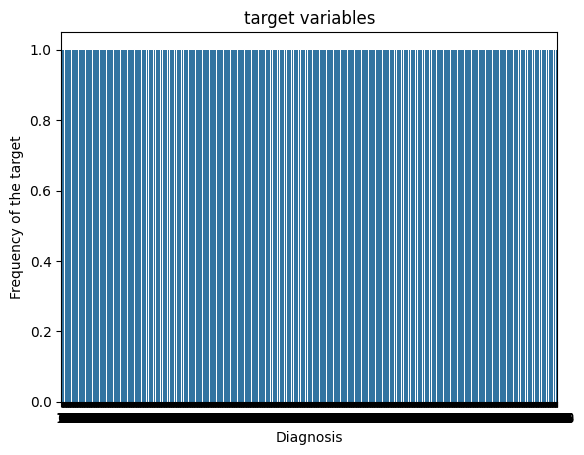

In [13]:
sns.countplot(df["Diagnosis"])
plt.xlabel("Diagnosis")
plt.ylabel("Frequency of the target")
plt.title("target variables")
plt.show()

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
X.shape

(1700, 10)

In [16]:
y.shape

(1700,)

In [17]:
y_train.shape

(1360,)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape


(1360, 10)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
knn.score(X_test,y_test)

0.7735294117647059

In [21]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[123,  39],
       [ 38, 140]])

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=9,random_state=42)
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=42)

In [25]:
clf.feature_importances_

array([0.09204736, 0.06378356, 0.11052445, 0.21166206, 0.05154377,
       0.07243332, 0.07596627, 0.        , 0.04966138, 0.27237784])

In [26]:
y_pred=clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)
cn

array([[141,  21],
       [ 28, 150]])

In [28]:
accuracy=accuracy_score(y_test,y_pred)
print("ACCURACY OF DECISION TREE MODEL IS:",accuracy)

ACCURACY OF DECISION TREE MODEL IS: 0.8558823529411764


In [31]:
scores=cross_val_score(clf,X,y,cv=5)
scores

array([0.82647059, 0.85882353, 0.90882353, 0.87058824, 0.73529412])

In [32]:
X = df.iloc[:,: -1]
y = df.iloc[:, -1]

In [33]:
X.shape

(1700, 10)

In [34]:
y.shape

(1700,)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(1360, 10)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [37]:
clf.feature_importances_

array([0.09337288, 0.04589926, 0.1015287 , 0.2770282 , 0.05284643,
       0.04556723, 0.0800133 , 0.01362931, 0.03483748, 0.25527721])

In [38]:
y_pred=clf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[135,  27],
       [ 12, 166]])

In [40]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("ACCURACY OF RANDOM FOREST MODEL IS:",accuracy)

ACCURACY OF RANDOM FOREST MODEL IS: 0.8852941176470588


In [41]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,X_train,y_train,cv=5)
scores

array([0.86764706, 0.86397059, 0.87867647, 0.90073529, 0.88602941])

In [42]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       162
           1       0.86      0.93      0.89       178

    accuracy                           0.89       340
   macro avg       0.89      0.88      0.88       340
weighted avg       0.89      0.89      0.88       340

